In [75]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### Data Preprocessing

In [76]:
df1 = pd.read_csv('data/2019.csv')
df2 = pd.read_csv('data/2020.csv')
df3 = pd.read_csv('data/2021.csv')
df4 = pd.read_csv('data/2022.csv', decimal=",")

df2 = df2[[ "Country name",
            "Ladder score",
            "Explained by: Log GDP per capita",
            "Explained by: Social support",
            "Explained by: Healthy life expectancy", 
            "Explained by: Freedom to make life choices",
            "Explained by: Generosity",
            "Explained by: Perceptions of corruption"]]

df3 = df3[[ "Country name",
            "Ladder score",
            "Explained by: Log GDP per capita",
            "Explained by: Social support",
            "Explained by: Healthy life expectancy", 
            "Explained by: Freedom to make life choices",
            "Explained by: Generosity",
            "Explained by: Perceptions of corruption"]]

df4 = df4[[ "Country",
            "Happiness score",
            "Explained by: GDP per capita",
            "Explained by: Social support",
            "Explained by: Healthy life expectancy", 
            "Explained by: Freedom to make life choices",
            "Explained by: Generosity",
            "Explained by: Perceptions of corruption"]].dropna()

df1.rename(columns={"Country or region": "Country name", "Freedom to make life choices": "Freedom", "Perceptions of corruption": "Corruption"}, inplace=True)
df1.drop(["Overall rank"], inplace=True, axis=1)

df2.rename(columns={"Ladder score": "Score",
                    "Explained by: Log GDP per capita": "GDP per capita",
                    "Explained by: Social support": "Social support",
                    "Explained by: Healthy life expectancy": "Healthy life expectancy",
                    "Explained by: Freedom to make life choices": "Freedom",
                    "Explained by: Generosity": "Generosity",
                    "Explained by: Perceptions of corruption": "Corruption"}, inplace=True)

df3.rename(columns={"Ladder score": "Score",
                    "Explained by: Log GDP per capita": "GDP per capita",
                    "Explained by: Social support": "Social support",
                    "Explained by: Healthy life expectancy": "Healthy life expectancy",
                    "Explained by: Freedom to make life choices": "Freedom",
                    "Explained by: Generosity": "Generosity",
                    "Explained by: Perceptions of corruption": "Corruption"}, inplace=True)

df4.rename(columns={"Country": "Country name",
                    "Happiness score": "Score",
                    "Explained by: GDP per capita": "GDP per capita",
                    "Explained by: Social support": "Social support",
                    "Explained by: Healthy life expectancy": "Healthy life expectancy",
                    "Explained by: Freedom to make life choices": "Freedom",
                    "Explained by: Generosity": "Generosity",
                    "Explained by: Perceptions of corruption": "Corruption"}, inplace=True)



In [80]:
df6 = pd.concat([df1, df2, df3, df4])
df = df6.sort_values(by=["Score"], ascending=False).reset_index(drop=True)

country_one_hot= pd.get_dummies(df["Country name"])
df = df.join(country_one_hot)
df = df.dropna().drop(["Country name"], axis=1)

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...
141,3.471,1.503,0.815,0.280,0.571,0.012,0.102
142,3.268,0.785,0.133,0.462,0.621,0.187,0.544
143,2.995,0.947,0.690,0.270,0.329,0.106,0.105
144,2.955,1.392,0.498,0.631,0.103,0.082,0.034


In [6]:
high = df.iloc[:201,:]
high['Score'] = 2
med = df.iloc[201:402,:]
med['Score'] = 1
low = df.iloc[402:604,:]
low['Score'] = 0

data = pd.concat([high, med, low])
data


C:\Users\vince\AppData\Local\Temp\ipykernel_8428\3897524235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high['Score'] = 2
C:\Users\vince\AppData\Local\Temp\ipykernel_8428\3897524235.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med['Score'] = 1
C:\Users\vince\AppData\Local\Temp\ipykernel_8428\3897524235.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Corruption,Afghanistan,Albania,Algeria,...,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Yemen*,Zambia,Zimbabwe
0,2,1.446000,1.106000,0.741000,0.691000,0.124000,0.481000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1.892000,1.258000,0.775000,0.736000,0.109000,0.534000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1.340000,1.587000,0.986000,0.596000,0.153000,0.393000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,0,0.306000,0.575000,0.295000,0.010000,0.202000,0.091000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
600,0,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,0,0,0,...,0,0,0,0,0,0,0,0,0,0
601,0,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226,1,0,0,...,0,0,0,0,0,0,0,0,0,0
602,0,0.370000,0.000000,0.126000,0.000000,0.122000,0.010000,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting Train and Test Sets

In [7]:
from sklearn.model_selection import train_test_split

X = data.drop(["Score"], axis=1)
y = data["Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)  # 70% training and 30% test

print(X_train.shape)


(483, 191)


### Model

In [8]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=500, random_state=0)

In [9]:
parameters = {
    'hidden_layer_sizes': [(128)],
    'activation': ['relu', 'identity', 'tanh'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [10]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameters, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

print('Best parameters found:\n', clf.best_params_)
print(clf.score(X_test,y_test))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 128, 'learning_rate': 'constant', 'solver': 'adam'}
0.8842975206611571


c:\Users\vince\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


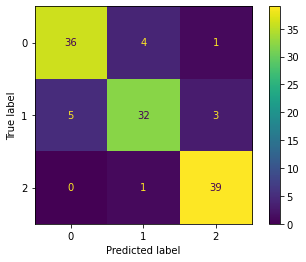

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix = cm)
display.plot()
plt.show()

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        41
           1       0.86      0.80      0.83        40
           2       0.91      0.97      0.94        40

    accuracy                           0.88       121
   macro avg       0.88      0.88      0.88       121
weighted avg       0.88      0.88      0.88       121



In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

In [67]:
parameters = {
    'n_estimators': [150,175,200,225],
    'max_features': ['auto','sqrt','log2'],
    'max_depth': [20,25,30,35,40],
}

In [68]:
clf = GridSearchCV(rf, parameters, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

print('Best parameters found:\n', clf.best_params_)
print(clf.score(X_test,y_test))

Best parameters found:
 {'max_depth': 25, 'max_features': 'log2', 'n_estimators': 150}
0.8099173553719008


In [88]:
myClassifiers = pd.Series(clf.best_estimator_.feature_importances_, index=X_train.columns)
top_features = myClassifiers.sort_values(ascending=False)
print (top_features.head(6))

GDP per capita             0.154137
Healthy life expectancy    0.145859
Freedom                    0.110533
Social support             0.092733
Corruption                 0.074073
Generosity                 0.058137
dtype: float64
